<a href="https://colab.research.google.com/github/Prethumnan/Sentiment-analyis/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Importing necessary libraries
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data=pd.read_csv("IMDB Dataset.csv")

In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


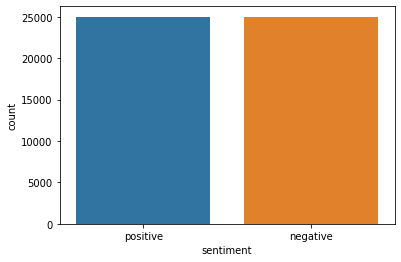

In [5]:
#checking whether the data is balanced or imbalanced
sns.countplot(data["sentiment"])

In [6]:
data["sentiment"]=data["sentiment"].replace({"positive":1,"negative":0})
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
#Text preprocessing
lemma=WordNetLemmatizer()
n=[]
for i in data["review"]:
    s=re.sub("[^a-zA-z]"," ",i)
    s=s.lower()
    s=s.split()
    k=[]
    for j in s:
        if j not in stopwords.words("english"):
            k.append(lemma.lemmatize(j))
    n.append(" ".join(k))

In [13]:
data["review_processed"]=n

In [14]:
data.head()

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


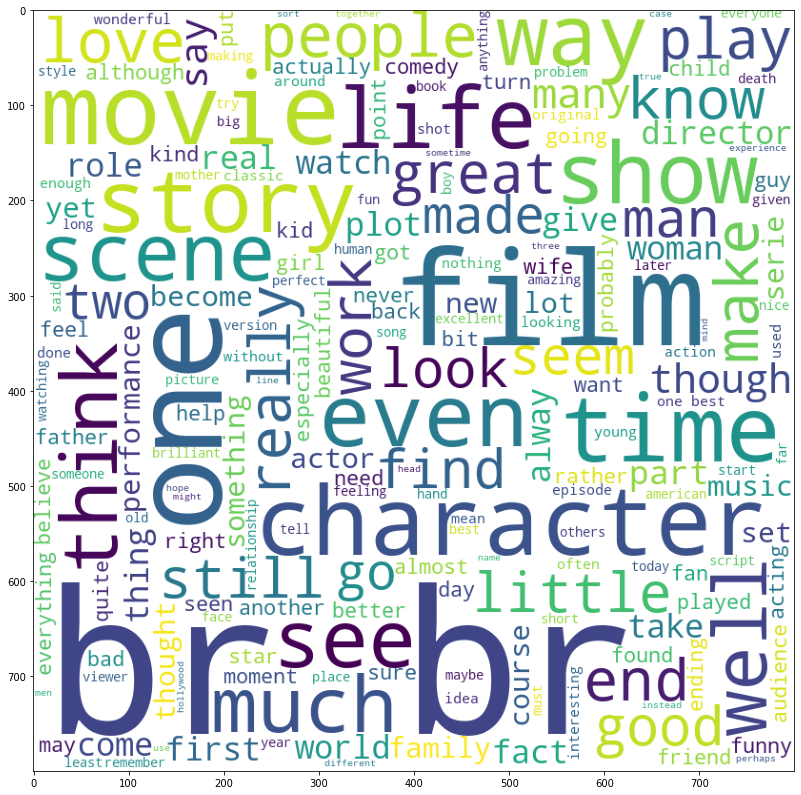

In [17]:
from wordcloud import WordCloud
df=data.loc[data["sentiment"]==1]
k=" ".join([i for i in df["review_processed"]])
wordcloud=WordCloud(width=800,height=800,background_color="white",min_font_size=10).generate(k)
plt.figure(figsize=(16,14))
plt.imshow(wordcloud)

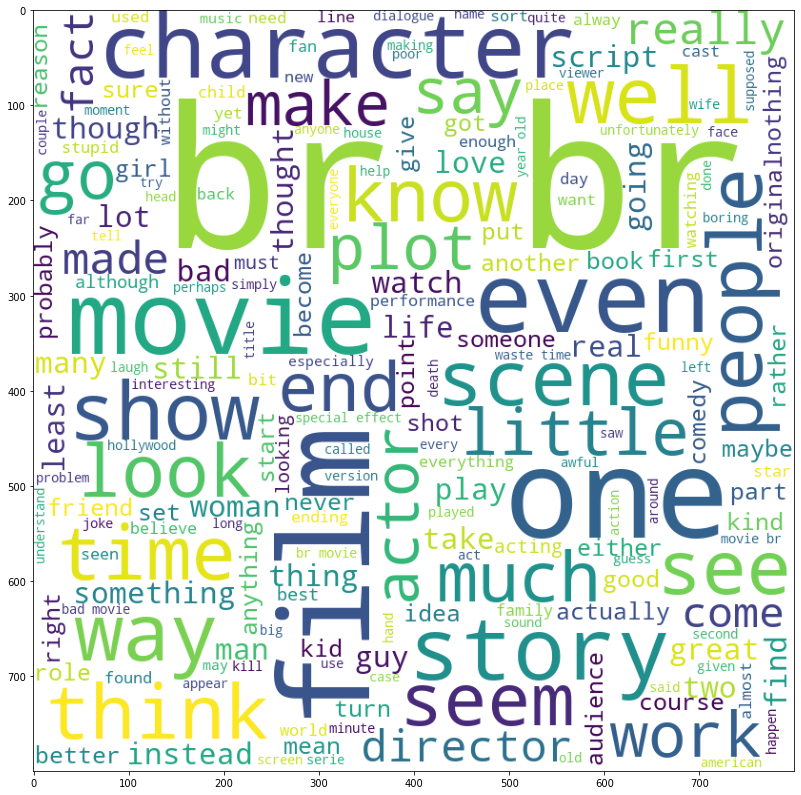

In [18]:
from wordcloud import WordCloud
df=data.loc[data["sentiment"]==0]
k=" ".join([i for i in df["review_processed"]])
wordcloud=WordCloud(width=800,height=800,background_color="white",min_font_size=10).generate(k)
plt.figure(figsize=(16,14))
plt.imshow(wordcloud)

In [32]:
#using TF-IDF method
tf=TfidfVectorizer(max_features=2500)
x=tf.fit_transform(data["review_processed"]).toarray()
y=data["sentiment"]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
#Model building
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [41]:
#Evaluating the model
print("Training accuracy : ",model.score(x_train,y_train))
print("Testing accuracy : ",model.score(x_test,y_test))
print("Cross validation score : ",np.mean(cross_val_score(model,x_train,y_train,cv=10)))
print("AUROC Score : ",roc_auc_score(y_test,y_pred))
print("F1 score : ",f1_score(y_test,y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

Training accuracy :  0.826975
Testing accuracy :  0.8107
Cross validation score :  0.8139499999999998
AUROC Score :  0.8106339856953618
F1 score :  0.8145390418340355
confusion_matrix
[[3950  941]
 [ 952 4157]]


In [89]:
output=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
output.to_csv("predicted.csv")